<a href="https://colab.research.google.com/github/lonewarriorHX/SkinSease/blob/master/SkinSease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SkinSease**

**Selected Theme**: Health Care
Title of the Project:
**"Skin Disease Detection Using Image Recognition"**

**Dataset:** <br>
- https://www.kaggle.com/mdsafayet/multiclass-disease-classification (_ORIGINAL VERSION_)
- https://www.kaggle.com/aurellashilla/skin-disease (_FILTERED TO 6 CLASSES OF SKIN DISEASE_)

**References**:


*   https://www.sehatq.com/artikel/jenis-penyakit-kulit-menular-dan-cara-mengobatinya

*   https://www.healthline.com/health/skin-disorders#:~:text=Examples%20of%20chronic%20skin%20conditions,large%2C%20irregular%20patches%20of%20skin



#**Project Scope & Deliverables**
We aim to use AI to achieve the objective of this project: creating techniques for the
classification of the skin images to predict.

There will be two main activities, the first one is collecting users skin and diseases data,
including their profile and authentication. The second one is skin analysis, which will ask the
permission of users to use the camera, identify what kind of diseases he/she has and give
notifications what skin he/she had. And after the condition is confirmed, the application will give
suggestions about the medicine or ointment they need to take.

Upload kaggle.json file and run the code below.

In [2]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


#Downloading the dataset from Kaggle
This dataset contains 6 classes of skin disease used as follows.
1. Dermatofibroma
2. Melanoma
3. Pigmented Benign Keratosis
4. Seborrheic Keratosis
5. Squamous Cell Carcinoma
6. Vascular Lesion

In [3]:
#Download dataset from kaggle
!kaggle datasets download aurellashilla/skin-disease

#train dataset
!kaggle datasets download aurellashilla/skin-train

#test dataset
!kaggle datasets download aurellashilla/skin-disease-test

#list directory
!ls

 97% 522M/539M [00:04<00:00, 124MB/s]
100% 539M/539M [00:04<00:00, 115MB/s]
100% 364M/364M [00:03<00:00, 139MB/s]

 99% 173M/174M [00:02<00:00, 66.0MB/s]
100% 174M/174M [00:02<00:00, 78.8MB/s]
sample_data  skin-disease-test.zip  skin-disease.zip  skin-train.zip


#Import Libraries

In [4]:
# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# TensorFlow Datsets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib

import os
import zipfile
from os import getcwd

assert tf.__version__.startswith('2')


#Data Pre-Processing

In [5]:
local_zip = 'skin-disease-test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = 'skin-train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [6]:
#split training data per class
dermatofib_dir = os.path.join('/tmp/skin_d/dermatofibroma')
melanoma_dir = os.path.join('/tmp/skin_d/melanoma')
pigmented_keratosis_dir = os.path.join('/tmp/skin_d/pigmented_benign_keratosis')
seborrheic_dir = os.path.join('/tmp/skin_d/seborrheic_keratosis')
squamous_dir = os.path.join('/tmp/skin_d/squamous_cell_carcinoma')
vascular_dir = os.path.join('/tmp/skin_d/vascular_lesion')

# showing total training images in each category
print('total training dermatofibroma images:', len(os.listdir(dermatofib_dir)))
print('total training melanoma images:', len(os.listdir(melanoma_dir)))
print('total training pigmented benign keratosis images:', len(os.listdir(pigmented_keratosis_dir)))
print('total training seborrheic keratosis images:', len(os.listdir(seborrheic_dir)))
print('total training squamous cell carcinoma images:', len(os.listdir(squamous_dir)))
print('total training vascular lesion images:', len(os.listdir(vascular_dir)))

total training dermatofibroma images: 95
total training melanoma images: 438
total training pigmented benign keratosis images: 462
total training seborrheic keratosis images: 77
total training squamous cell carcinoma images: 181
total training vascular lesion images: 139


In [7]:
dermatofib_files = os.listdir(dermatofib_dir)
print(dermatofib_files[:10])

melanoma_files = os.listdir(melanoma_dir)
print(melanoma_files[:10])

pigmented_keratosis_files = os.listdir(pigmented_keratosis_dir)
print(pigmented_keratosis_files[:10])

seborrheic_files = os.listdir(seborrheic_dir)
print(seborrheic_files[:10])

squamous_files = os.listdir(squamous_dir)
print(squamous_files[:10])

vascular_files = os.listdir(vascular_dir)
print(vascular_files[:10])

['ISIC_0033780.jpg', 'ISIC_0030442.jpg', 'ISIC_0029962.jpg', 'ISIC_0030665.jpg', 'ISIC_0029973.jpg', 'ISIC_0029052.jpg', 'ISIC_0027008.jpg', 'ISIC_0029578.jpg', 'ISIC_0028880.jpg', 'ISIC_0026629.jpg']
['ISIC_0001135.jpg', 'ISIC_0010860.jpg', 'ISIC_0000155.jpg', 'ISIC_0010283.jpg', 'ISIC_0010852.jpg', 'ISIC_0010397.jpg', 'ISIC_0010503.jpg', 'ISIC_0000522.jpg', 'ISIC_0010610.jpg', 'ISIC_0000313.jpg']
['ISIC_0027053.jpg', 'ISIC_0025510.jpg', 'ISIC_0026907.jpg', 'ISIC_0026607.jpg', 'ISIC_0026409.jpg', 'ISIC_0024498.jpg', 'ISIC_0027606.jpg', 'ISIC_0024773.jpg', 'ISIC_0024505.jpg', 'ISIC_0026422.jpg']
['ISIC_0010860.jpg', 'ISIC_0010852.jpg', 'ISIC_0011135.jpg', 'ISIC_0010862.jpg', 'ISIC_0011178.jpg', 'ISIC_0010866.jpg', 'ISIC_0011056.jpg', 'ISIC_0011007.jpg', 'ISIC_0011132.jpg', 'ISIC_0010863.jpg']
['ISIC_0029563.jpg', 'ISIC_0030549.jpg', 'ISIC_0025089.jpg', 'ISIC_0027577.jpg', 'ISIC_0031043.jpg', 'ISIC_0027231.jpg', 'ISIC_0030591.jpg', 'ISIC_0029043.jpg', 'ISIC_0030707.jpg', 'ISIC_0028132.j

# Data Visualization

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_dermatofib = [os.path.join(dermatofib_dir, fname) 
                for fname in dermatofib_files[pic_index-2:pic_index]]
next_melanoma = [os.path.join(melanoma_dir, fname) 
                for fname in melanoma_files[pic_index-2:pic_index]]
next_pigmented_keratosis = [os.path.join(pigmented_keratosis_dir, fname) 
                for fname in pigmented_keratosis_files[pic_index-2:pic_index]]
next_seborrheic = [os.path.join(seborrheic_dir, fname) 
                for fname in seborrheic_files[pic_index-2:pic_index]]
next_squamous = [os.path.join(squamous_dir, fname) 
                for fname in squamous_files[pic_index-2:pic_index]] 
next_vascular = [os.path.join(vascular_dir, fname) 
                for fname in vascular_files[pic_index-2:pic_index]]        

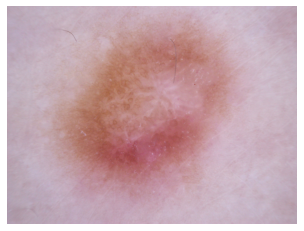

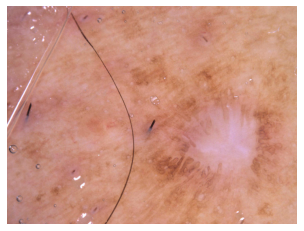

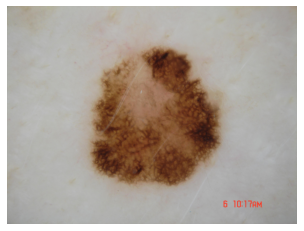

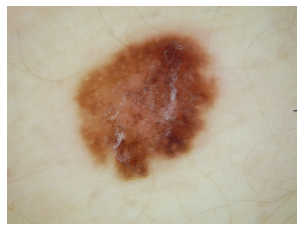

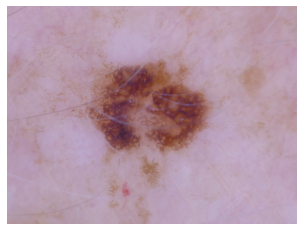

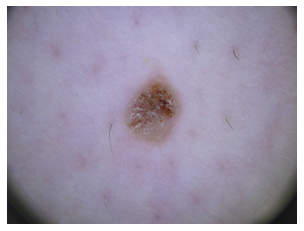

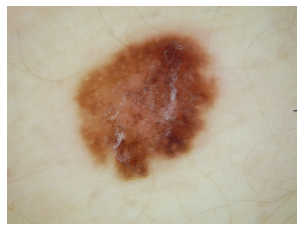

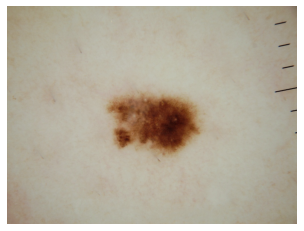

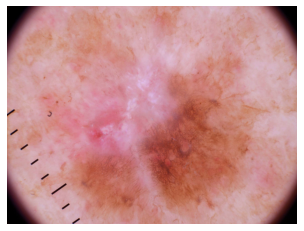

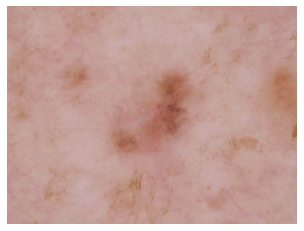

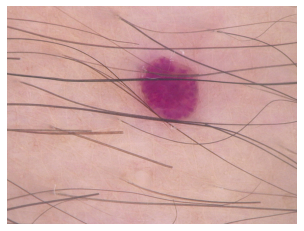

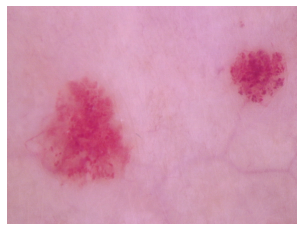

In [9]:
# Visualize the data
for i, img_path in enumerate(next_dermatofib+next_melanoma+next_pigmented_keratosis+next_seborrheic+next_squamous+next_vascular):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

#Data Augmentation

In [10]:
# Import libraries for preprocessing
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [11]:
# Rescale the dataset
TRAINING_DIR = "/tmp/skin_d/"
training_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

VALIDATION_DIR = "/tmp/skin-test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Flow training images in batches of 16 using train_datagen generator
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR, # directory of the training dataset
	target_size=(150, 150),
	class_mode='categorical', # as we're working on multiclass dataset
  batch_size=16)

# Flow validation images in batches of 16 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR, # directory of the validation dataset
	target_size=(150, 150),
	class_mode='categorical', # as we're working on multiclass dataset
  batch_size=16)

Found 1392 images belonging to 6 classes.
Found 70 images belonging to 6 classes.


In [13]:
# Obtain the index for each class
print(validation_generator.class_indices)

{'dermatofibroma': 0, 'melanoma': 1, 'pigmented_benign_keratosis': 2, 'seborrheic_keratosis': 3, 'squamous_cell_carcinoma': 4, 'vascular_lesion': 5}


In [14]:
# Import libraries for preprocessing
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# Perform data augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(150, 150, 3)),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(height_factor=1, width_factor=None, fill_mode='reflect',
    interpolation='bilinear')
])

In [ ]:
# Data Augmentation Exploration

import numpy as np
from google.colab import files
from keras.preprocessing import image

pics = files.upload()

rotated = tf.image.rot90(pics)
visualize(pics, rotated)

cropped = tf.image.central_crop(pics, central_fraction=0.5)
visualize(pics,cropped)

bright = tf.image.adjust_brightness(pics, 0.4)
visualize(pics, bright)

saturated = tf.image.adjust_saturation(pics, 3)
visualize(pics, saturated)

grayscaled = tf.image.rgb_to_grayscale(pics)
visualize(pics, tf.squeeze(grayscaled))
_ = plt.colorbar()

flipped = tf.image.flip_left_right(pics)
visualize(pics, flipped)

def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

In [ ]:
images, label = next(iter(train_generator))
_ = plt.imshow(images)
_ = plt.title(get_label_name(label))

# Visualize before-after applying data augmentation
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

Found 1392 files belonging to 6 classes.
Using 1114 files for training.
Found 70 files belonging to 6 classes.
Using 14 files for validation.


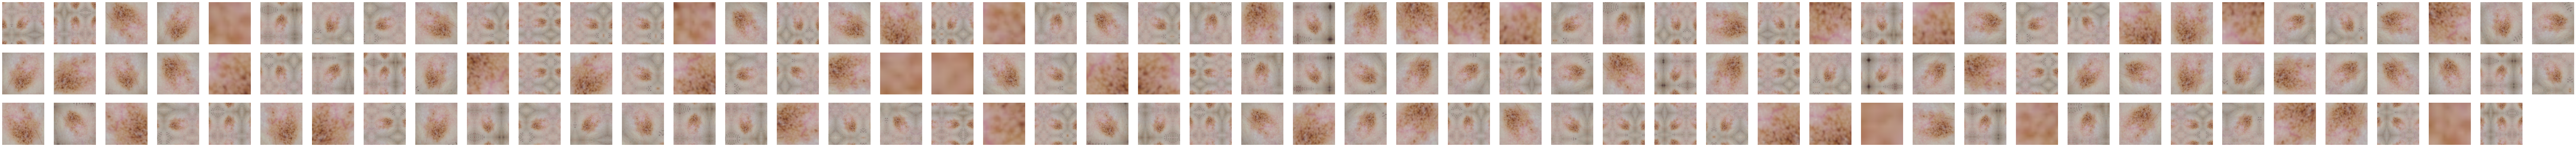

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAINING_DIR,
    validation_split=0.2,
    subset="training",
    seed=1392,
    image_size=(150, 150),
    batch_size=50
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    VALIDATION_DIR,
    validation_split=0.2,
    subset="validation",
    seed=70,
    image_size=(150,150),
    batch_size=5
)

plt.figure(figsize=(150, 150))
for images, _ in train_ds.take(1):
    for i in range(149):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(50, 50, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [18]:
# Post augmented
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR, # directory of the training dataset
	target_size=(150, 150),
	class_mode='categorical', # as we're working on multiclass daaset
  batch_size=5
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR, # directory of the validation dataset
	target_size=(150, 150),
	class_mode='categorical', # as we're working on multiclass daaset
  batch_size=1
)

Found 1392 images belonging to 6 classes.
Found 70 images belonging to 6 classes.


# **Model Training**
###**Model Building**
At this stage, we're building a keras model for image classification that consists of 4 convolutional layer and 512 hidden layers.


In [19]:
# Building the model
model = tf.keras.models.Sequential([
    # Make the prepocessing layer using data augmentation as a part of the model                                
    data_augmentation,
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

After defining the model, generating the summary of the model would be a good thing to do.

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)      

#Model Fitting
After building the model, we could start training to evaluate the model.

In [21]:
# FIRST ATTEMPT (with augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

training_model = model.fit(train_generator,
                           epochs=25,
                           validation_data=validation_generator)

Epoch 1/25
279/279 [==============================] - 62s 113ms/step - loss: 1.4856 - accuracy: 0.4353 - val_loss: 1.8918 - val_accuracy: 0.3143
Epoch 2/25
279/279 [==============================] - 32s 114ms/step - loss: 1.2455 - accuracy: 0.5489 - val_loss: 1.8451 - val_accuracy: 0.2429
Epoch 3/25
279/279 [==============================] - 32s 115ms/step - loss: 1.1669 - accuracy: 0.5812 - val_loss: 2.0060 - val_accuracy: 0.3429
Epoch 4/25
279/279 [==============================] - 32s 113ms/step - loss: 1.1231 - accuracy: 0.5905 - val_loss: 1.8107 - val_accuracy: 0.3714
Epoch 5/25
279/279 [==============================] - 32s 114ms/step - loss: 1.0647 - accuracy: 0.6135 - val_loss: 1.7139 - val_accuracy: 0.2714
Epoch 6/25
279/279 [==============================] - 32s 114ms/step - loss: 1.0177 - accuracy: 0.6315 - val_loss: 1.8924 - val_accuracy: 0.3429
Epoch 7/25
279/279 [==============================] - 32s 114ms/step - loss: 1.0319 - accuracy: 0.6315 - val_loss: 1.8808 - val_ac

In [22]:
# SECOND ATTEMPT (without augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
279/279 [==============================] - 32s 113ms/step - loss: 0.8960 - accuracy: 0.6703 - val_loss: 1.6224 - val_accuracy: 0.4571
Epoch 2/25
279/279 [==============================] - 32s 114ms/step - loss: 0.8850 - accuracy: 0.6659 - val_loss: 1.6044 - val_accuracy: 0.5286
Epoch 3/25
279/279 [==============================] - 32s 113ms/step - loss: 0.8734 - accuracy: 0.6652 - val_loss: 1.7619 - val_accuracy: 0.4286
Epoch 4/25
279/279 [==============================] - 31s 112ms/step - loss: 0.8454 - accuracy: 0.6932 - val_loss: 1.6664 - val_accuracy: 0.5286
Epoch 5/25
279/279 [==============================] - 32s 114ms/step - loss: 0.8662 - accuracy: 0.6789 - val_loss: 1.7470 - val_accuracy: 0.5286
Epoch 6/25
279/279 [==============================] - 32s 114ms/step - loss: 0.8513 - accuracy: 0.6846 - val_loss: 1.7226 - val_accuracy: 0.4143
Epoch 7/25
279/279 [==============================] - 32s 114ms/step - loss: 0.8447 - accuracy: 0.6803 - val_loss: 1.5618 - val_ac

In [23]:
# THIRD ATTEMPT (without augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
279/279 [==============================] - 33s 116ms/step - loss: 0.7846 - accuracy: 0.7112 - val_loss: 1.9392 - val_accuracy: 0.4286
Epoch 2/25
279/279 [==============================] - 32s 115ms/step - loss: 0.7857 - accuracy: 0.7126 - val_loss: 2.0496 - val_accuracy: 0.4143
Epoch 3/25
279/279 [==============================] - 32s 115ms/step - loss: 0.7992 - accuracy: 0.7026 - val_loss: 2.1786 - val_accuracy: 0.4571
Epoch 4/25
279/279 [==============================] - 32s 115ms/step - loss: 0.7676 - accuracy: 0.7076 - val_loss: 2.2065 - val_accuracy: 0.3571
Epoch 5/25
279/279 [==============================] - 32s 115ms/step - loss: 0.7771 - accuracy: 0.7026 - val_loss: 1.9620 - val_accuracy: 0.4143
Epoch 6/25
279/279 [==============================] - 32s 114ms/step - loss: 0.7703 - accuracy: 0.7098 - val_loss: 1.7450 - val_accuracy: 0.4429
Epoch 7/25
279/279 [==============================] - 32s 114ms/step - loss: 0.7882 - accuracy: 0.7284 - val_loss: 1.8526 - val_ac

In [24]:
# FOURTH ATTEMPT (with augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
279/279 [==============================] - 37s 129ms/step - loss: 0.7374 - accuracy: 0.7277 - val_loss: 2.2915 - val_accuracy: 0.4143
Epoch 2/25
279/279 [==============================] - 36s 128ms/step - loss: 0.7425 - accuracy: 0.7148 - val_loss: 1.6492 - val_accuracy: 0.5714
Epoch 3/25
279/279 [==============================] - 35s 127ms/step - loss: 0.7484 - accuracy: 0.7277 - val_loss: 1.5675 - val_accuracy: 0.5571
Epoch 4/25
279/279 [==============================] - 36s 129ms/step - loss: 0.7343 - accuracy: 0.7306 - val_loss: 1.9653 - val_accuracy: 0.4857
Epoch 5/25
279/279 [==============================] - 33s 119ms/step - loss: 0.7235 - accuracy: 0.7371 - val_loss: 1.6871 - val_accuracy: 0.5000
Epoch 6/25
279/279 [==============================] - 33s 119ms/step - loss: 0.7190 - accuracy: 0.7320 - val_loss: 1.7495 - val_accuracy: 0.4714
Epoch 7/25
279/279 [==============================] - 36s 127ms/step - loss: 0.7511 - accuracy: 0.7184 - val_loss: 1.7041 - val_ac

In [25]:
# FIFTH ATTEMPT (without augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
279/279 [==============================] - 34s 120ms/step - loss: 0.6905 - accuracy: 0.7407 - val_loss: 1.6955 - val_accuracy: 0.5286
Epoch 2/25
279/279 [==============================] - 33s 119ms/step - loss: 0.7031 - accuracy: 0.7435 - val_loss: 1.9409 - val_accuracy: 0.4571
Epoch 3/25
279/279 [==============================] - 33s 119ms/step - loss: 0.6615 - accuracy: 0.7428 - val_loss: 1.8857 - val_accuracy: 0.5143
Epoch 4/25
279/279 [==============================] - 33s 120ms/step - loss: 0.7182 - accuracy: 0.7306 - val_loss: 2.0730 - val_accuracy: 0.5000
Epoch 5/25
279/279 [==============================] - 33s 120ms/step - loss: 0.6801 - accuracy: 0.7435 - val_loss: 1.9096 - val_accuracy: 0.5000
Epoch 6/25
279/279 [==============================] - 33s 120ms/step - loss: 0.7089 - accuracy: 0.7320 - val_loss: 1.8457 - val_accuracy: 0.5429
Epoch 7/25
279/279 [==============================] - 33s 119ms/step - loss: 0.6871 - accuracy: 0.7270 - val_loss: 1.8185 - val_ac

In [26]:
# SIXTH ATTEMPT (Without Augmentation)
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
279/279 [==============================] - 34s 119ms/step - loss: 0.6506 - accuracy: 0.7586 - val_loss: 1.6983 - val_accuracy: 0.5429
Epoch 2/25
279/279 [==============================] - 33s 119ms/step - loss: 0.6684 - accuracy: 0.7428 - val_loss: 2.0795 - val_accuracy: 0.4571
Epoch 3/25
279/279 [==============================] - 33s 119ms/step - loss: 0.6653 - accuracy: 0.7457 - val_loss: 1.7663 - val_accuracy: 0.4286
Epoch 4/25
279/279 [==============================] - 33s 118ms/step - loss: 0.6415 - accuracy: 0.7622 - val_loss: 1.8116 - val_accuracy: 0.5429
Epoch 5/25
279/279 [==============================] - 33s 117ms/step - loss: 0.6822 - accuracy: 0.7421 - val_loss: 1.6121 - val_accuracy: 0.5571
Epoch 6/25
279/279 [==============================] - 33s 117ms/step - loss: 0.6529 - accuracy: 0.7522 - val_loss: 1.7398 - val_accuracy: 0.4857
Epoch 7/25
279/279 [==============================] - 33s 118ms/step - loss: 0.6334 - accuracy: 0.7608 - val_loss: 1.7085 - val_ac

In [27]:
# 7th Attempt Without Augmentation
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
279/279 [==============================] - 33s 117ms/step - loss: 0.6150 - accuracy: 0.7672 - val_loss: 2.0424 - val_accuracy: 0.4714
Epoch 2/25
279/279 [==============================] - 33s 117ms/step - loss: 0.6079 - accuracy: 0.7680 - val_loss: 1.8806 - val_accuracy: 0.5286
Epoch 3/25
279/279 [==============================] - 33s 118ms/step - loss: 0.5864 - accuracy: 0.7859 - val_loss: 1.8362 - val_accuracy: 0.5143
Epoch 4/25
279/279 [==============================] - 33s 120ms/step - loss: 0.6075 - accuracy: 0.7672 - val_loss: 1.6440 - val_accuracy: 0.6000
Epoch 5/25
279/279 [==============================] - 33s 118ms/step - loss: 0.6138 - accuracy: 0.7629 - val_loss: 1.8863 - val_accuracy: 0.5000
Epoch 6/25
279/279 [==============================] - 33s 119ms/step - loss: 0.6083 - accuracy: 0.7644 - val_loss: 1.7621 - val_accuracy: 0.5714
Epoch 7/25
279/279 [==============================] - 33s 117ms/step - loss: 0.5844 - accuracy: 0.7773 - val_loss: 1.9786 - val_ac

In [28]:
# 8th Attempt Without Augmentation
model.compile(loss = 'categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              epochs=25,
                              validation_data=validation_generator)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


279/279 [==============================] - 35s 123ms/step - loss: 0.5769 - accuracy: 0.7816 - val_loss: 1.7973 - val_accuracy: 0.5143
Epoch 2/25
279/279 [==============================] - 33s 120ms/step - loss: 0.5906 - accuracy: 0.7751 - val_loss: 2.1404 - val_accuracy: 0.4714
Epoch 3/25
279/279 [==============================] - 33s 118ms/step - loss: 0.5887 - accuracy: 0.7601 - val_loss: 1.5937 - val_accuracy: 0.4857
Epoch 4/25
279/279 [==============================] - 33s 119ms/step - loss: 0.5932 - accuracy: 0.7816 - val_loss: 1.7474 - val_accuracy: 0.5286
Epoch 5/25
279/279 [==============================] - 33s 120ms/step - loss: 0.5731 - accuracy: 0.7780 - val_loss: 1.6878 - val_accuracy: 0.4857
Epoch 6/25
279/279 [==============================] - 32s 116ms/step - loss: 0.5550 - accuracy: 0.7909 - val_loss: 1.9307 - val_accuracy: 0.5714
Epoch 7/25
279/279 [==============================] - 32s 116ms/step - loss: 0.5816 - accuracy: 0.7737 - val_loss: 2.0974 - val_accuracy: 0.4

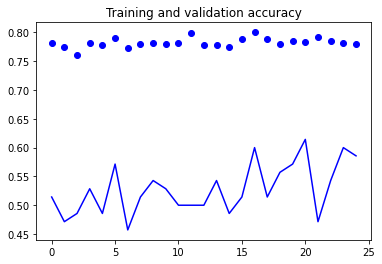

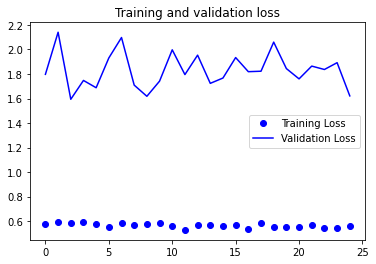

In [29]:
# Plot train and validation acc & loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
# without augmentation accuracy plot
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Visualize Training Result

To get a better understanding of how good the model is, let's visualize the accuracy and loss of training & validation.

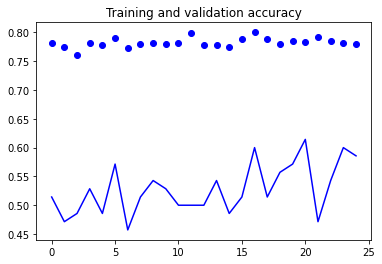

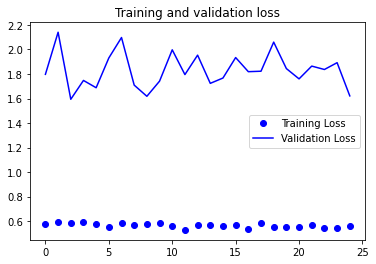

In [31]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
# without augmentation accuracy plot
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Predict

In [34]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
	# predicting images
	path = fn
	img = image.load_img(path, target_size=(150, 150))
	x = image.img_to_array(img)
	x = np.expand_dims(x, axis=0)

	images = np.vstack([x])
	classes = model.predict(images)
	print(fn)
	print(classes)

Saving ISIC_0000029.jpg to ISIC_0000029 (1).jpg
ISIC_0000029.jpg
[[0. 1. 0. 0. 0. 0.]]


##Saved Trained Model

In [35]:
# Saving model into .h5 (keras model) format
model.save("skin-disease.h5")

####Based on the CNN Model result, the validation accuracy obtained is fluktuate and lower than the training accuracy. This indicates our model is overfitting.

####To overcome this, let's use pre-trained model by TensorFlow Lite Model Maker library and adding dropout layer to prevent overfit. 
The TensorFlow Lite Model Maker library simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

Dropout layer is useful for regularizing DNN models. The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.



#==== Transfer Learning ====
### Reference: https://www.tensorflow.org/lite/tutorials/model_maker_image_classification

Let's install the model maker first.

In [36]:
#Install model maker
!pip install -q tflite-model-maker

     |████████████████████████████████| 593kB 4.8MB/s 
     |████████████████████████████████| 686kB 9.7MB/s 
     |████████████████████████████████| 122kB 20.1MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 6.3MB 13.1MB/s 
     |████████████████████████████████| 174kB 48.9MB/s 
     |████████████████████████████████| 645kB 36.3MB/s 
     |████████████████████████████████| 112kB 55.2MB/s 
     |████████████████████████████████| 849kB 48.7MB/s 
     |████████████████████████████████| 1.1MB 51.8MB/s 
     |████████████████████████████████| 92kB 11.9MB/s 
     |████████████████████████████████| 1.2MB 45.2MB/s 
     |████████████████████████████████| 358kB 50.4MB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
     |████████████████████████████████| 38.2MB 79kB/s 
     |████████████████████████████████| 194kB 53.1MB/s 


In [37]:
# Import Libraries
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

In [38]:
local_zip = 'skin-disease.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [39]:
DATASET_DIR = "/tmp/skin_disease/"

####Step 1. Load input data. 
Use `DataLoader` class to load data. 
Split the data into training data (90%) and testing data (10%).

In [40]:
data = DataLoader.from_folder(DATASET_DIR)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 1462, num_label: 6, labels: dermatofibroma, melanoma, pigmented_benign_keratosis, seborrheic_keratosis, squamous_cell_carcinoma, vascular_lesion.


Show 25 image examples with label.

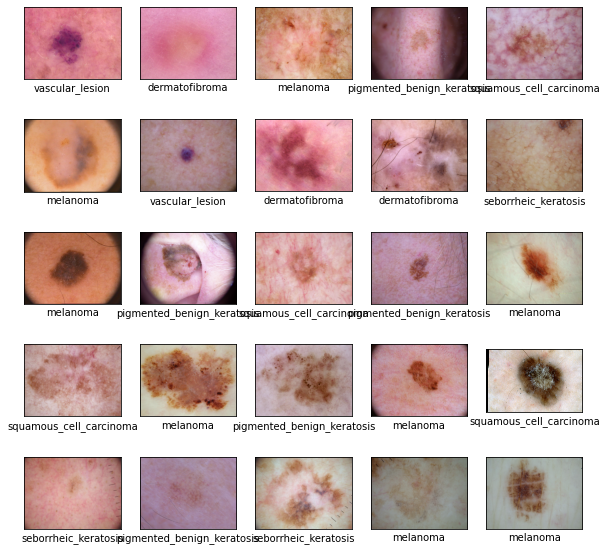

In [41]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

###Step 2: Customize the TensorFlow Model
Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.

In [48]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 7686      
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


41/41 [==============================] - 41s 946ms/step - loss: 1.5090 - accuracy: 0.4604
Epoch 2/5
41/41 [==============================] - 40s 939ms/step - loss: 1.2326 - accuracy: 0.5983
Epoch 3/5
41/41 [==============================] - 40s 957ms/step - loss: 1.1358 - accuracy: 0.6623
Epoch 4/5
41/41 [==============================] - 40s 946ms/step - loss: 1.0955 - accuracy: 0.6867
Epoch 5/5
41/41 [==============================] - 40s 936ms/step - loss: 1.0665 - accuracy: 0.6883


In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 7686      
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________


###Step 3: Evaluate the Customized Model
Evaluate the result of the model, get the loss and accuracy of the model.

In [51]:
loss, accuracy = model.evaluate(test_data)

5/5 [==============================] - 12s 831ms/step - loss: 1.1288 - accuracy: 0.6395


###Step 4: Export to TensorFlow Lite Model
Convert the trained model to TensorFlow Lite model format with metadata so that you can later use in an on-device ML application. The label file and the vocab file are embedded in metadata. The default TFLite filename is model.tflite.

In [52]:
#export model
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpkqe92o6c/assets


INFO:tensorflow:Assets written to: /tmp/tmpkqe92o6c/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpu1l855ul/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpu1l855ul/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [53]:
#download tflite
from google.colab import files
files.download('model.tflite') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>